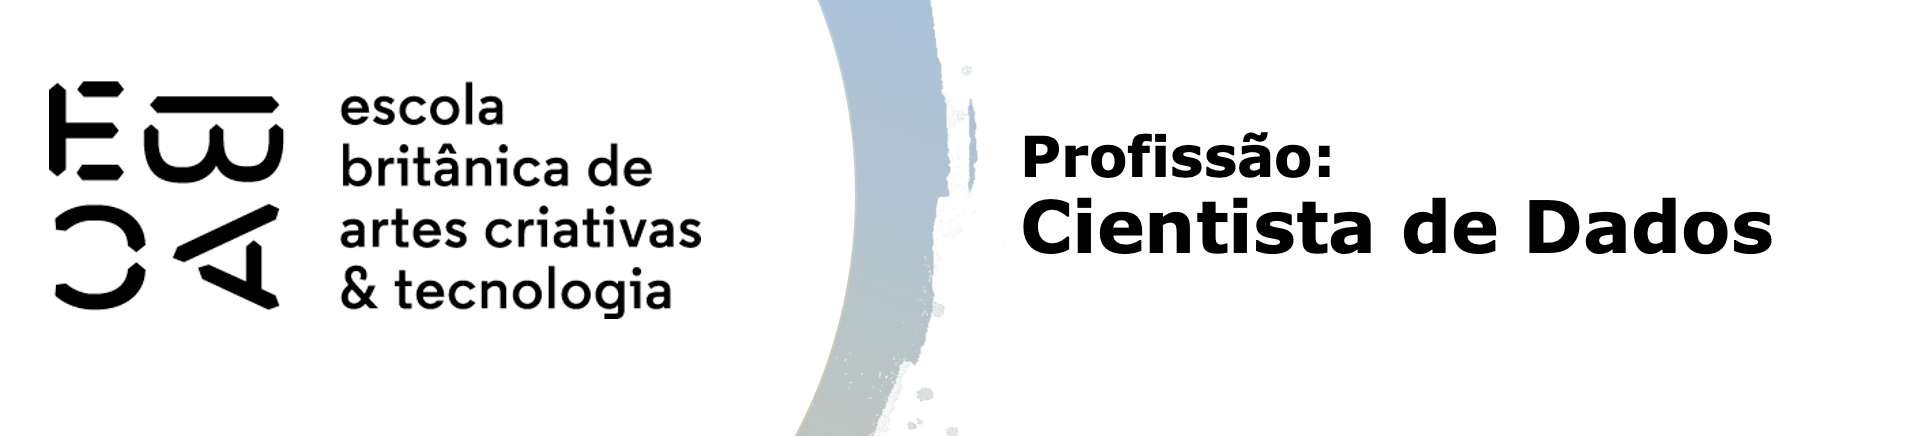

# Análise de *Clusters*

## Aplicação

Nesta demonstração vamos aplicar o K-Means na based de dados de "*Human Activity Recognition using Smartphones*", disponível no [UCI](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones) (repositório de bases de dados para *Machine Learning* da Universidade de Irvine.

## Fluxo de projeto

Lembre-se do [CRISP-DM](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining). Ao discutir o algoritmo estamos nos concentrando em uma parte específica do fluxo de um projeto enorme, mas essa parte depende fortemente do entendimento do negócio.

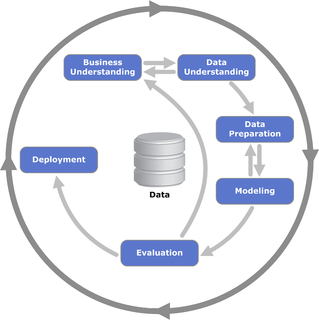

Métodos de agrupamento trazem uma carga subjetiva bem maior que métodos de classificação como árvores de decisão e *random forest*, e o entendimento do negócio tem um papel crucial aqui. Ao decidir que variáveis entram no modelo estamos interferindo fortemente nos resultados, e essa decisão deve depender do objetivo do negócio. Por exemplo, se o objetivo é entender padrões de consumo, tipicamente variáveis biométricas ou financeiras do cliente não devem ser relevantes. Por outro lado, se estamos estudando o desempenho de atletas, talvez a prioridade seja diferente.

**O nosso objetivo** é verificar se encontramos padrões de movimentação que definam bem grupos de observações semelhantes entre si e diferentes entre si, depois vamos tentar interpretar estes grupos.

Para isso vamos fazer uma seleção de variáveis (*feature selection*) com ideias bem simples, porém usando um pouco a criatividade para estarmos conectados aos objetivos iniciais. Esteja sempre conectado ao objetivo inicial!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
X_train = pd.read_feather('data/X_train.ftr')
y_train = pd.read_feather('data/y_train.ftr')
X_test = pd.read_feather('data/X_test.ftr')
y_test = pd.read_feather('data/y_test.ftr')
labels = pd.read_feather('data/labels.ftr')

y_train_cat = pd.Categorical.from_codes(codes=(y_train-1).values.flatten(),categories= labels.label)
y_train_cat.value_counts()

WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
SITTING               1286
STANDING              1374
LAYING                1407
dtype: int64

## Tratamento das variáveis

Já vimos que a escala de medida das variáveis pode ter um impacto bastante relevante no resultado de um agrupamento, o que pode ter um efeito arbitrário, sem controle e levar a resultados ruins. Vamos padronizar todas as variáveis para que fiquem com média 0 e variância 1, de modo a mitigar esse efeito.

**OBS:** A saída do ```StandardScaler``` é um array do Numpy. Vamos converter em *Data aFrame* do Pandas.

Vamos aproveitar e colocar o rótulo na base, já transformando no tipo Category do Pandas, que facilita muito o tratamento (além de ganhar eficiencia em termos de armazenamento e velocidade).

In [4]:
X_pad = pd.DataFrame(StandardScaler().fit_transform(X_train), columns = X_train.columns)

X_pad['y'] = y_train_cat

## Seleção de variáveis

Lembrando do nosso objetivo: capturar padrões de movimento nas variáveis de variação do acelerômetro e giroscópio do celular, tipificando grupos de variação semelhantes dentro, e diferentes entre grupos.

Tendo isso em mente, a ideia é selecionar variáveis que representem as atividades que as pessoas estão fazendo, uma para cada atividade. Então vamos usar a criatividade (rimou...).

Vamos calcular a média de cada variável dentro de cada um dos grupos. Lembrando que a média geral das variáveis padronizadas é zero, um valor descolado do zero deve indicar que a variável representa aquele comportamento. Então vamos selecionar a variável com o maior valor absoluto da mediana para cada comportamento.

In [5]:
med_por_grupo = X_pad.groupby('y').median()
med_por_grupo

1 tBodyAcc-mean()-X  2 tBodyAcc-mean()-Y  \
y                                                              
WALKING                        0.001339            -0.004197   
WALKING_UPSTAIRS              -0.111342            -0.129993   
WALKING_DOWNSTAIRS             0.148981            -0.000460   
SITTING                        0.040108             0.030341   
STANDING                       0.042968             0.014663   
LAYING                         0.034988             0.008128   

                    3 tBodyAcc-mean()-Z  4 tBodyAcc-std()-X  \
y                                                             
WALKING                       -0.022651            0.624258   
WALKING_UPSTAIRS              -0.079354            0.826692   
WALKING_DOWNSTAIRS             0.001794            1.667572   
SITTING                        0.017935           -0.864828   
STANDING                       0.006529           -0.866348   
LAYING                         0.018309           -0.840948   

                    5 tBodyAcc-std()-Y  6 tBodyAcc-std()-Z  \
y                                                            
WALKING                       0.943942            0.783498   
WALKING_UPSTAIRS              0.979932            0.979584   
WALKING_DOWNSTAIRS            1.138867            0.877696   
SITTING                      -0.931991           -0.887878   
STANDING                     -0.906935           -0.881136   
LAYING                       -0.929483           -0.900528   

                    7 tBodyAcc-mad()-X  8 tBodyAcc-mad()-Y  \
y                                                            
WALKING                       0.629471            0.947902   
WALKING_UPSTAIRS              0.796929            1.010035   
WALKING_DOWNSTAIRS            1.655572            1.093075   
SITTING                      -0.858224           -0.931200   
STANDING                     -0.859298           -0.906065   
LAYING                       -0.834799           -0.930004   

                    9 tBodyAcc-mad()-Z  10 tBodyAcc-max()-X  ...  \
y                                                            ...   
WALKING                       0.778652             0.668609  ...   
WALKING_UPSTAIRS              1.036648             0.788137  ...   
WALKING_DOWNSTAIRS            0.858755             1.739815  ...   
SITTING                      -0.892588            -0.860296  ...   
STANDING                     -0.886009            -0.860320  ...   
LAYING                       -0.906778            -0.842210  ...   

                    552 fBodyBodyGyroJerkMag-meanFreq()  \
y                                                         
WALKING                                       -0.038043   
WALKING_UPSTAIRS                              -0.136773   
WALKING_DOWNSTAIRS                            -0.081643   
SITTING                                        0.314368   
STANDING                                       0.012261   
LAYING                                         0.260927   

                    553 fBodyBodyGyroJerkMag-skewness()  \
y                                                         
WALKING                                        0.548251   
WALKING_UPSTAIRS                              -0.273354   
WALKING_DOWNSTAIRS                            -0.067258   
SITTING                                       -0.410291   
STANDING                                      -0.284633   
LAYING                                        -0.315508   

                    554 fBodyBodyGyroJerkMag-kurtosis()  \
y                                                         
WALKING                                        0.375385   
WALKING_UPSTAIRS                              -0.402196   
WALKING_DOWNSTAIRS                            -0.289348   
SITTING                                       -0.505962   
STANDING                                      -0.398046   
LAYING                                        -0.422225   

                    555 angle(tBodyAccMean,g

Agora vamos selecionar as colunas, pegando para cada linha o nome da coluna com valor máximo.

In [10]:
colunas = med_por_grupo.abs().idxmax(axis=1).values
colunas

array(['349 fBodyAccJerk-std()-Y', '370 fBodyAccJerk-maxInds-X',
       '509 fBodyAccMag-energy()', '78 tGravityAcc-correlation()-X,Y',
       '297 fBodyAcc-skewness()-X', '57 tGravityAcc-energy()-X'],
      dtype=object)

In [11]:
med_por_grupo[colunas]

349 fBodyAccJerk-std()-Y  370 fBodyAccJerk-maxInds-X  \
y                                                                          
WALKING                             1.202232                   -0.054779   
WALKING_UPSTAIRS                    0.531527                   -1.279263   
WALKING_DOWNSTAIRS                  1.166609                   -1.279263   
SITTING                            -0.856693                    0.679912   
STANDING                           -0.848196                    0.679912   
LAYING                             -0.859069                    0.435015   

                    509 fBodyAccMag-energy()  \
y                                              
WALKING                             0.173209   
WALKING_UPSTAIRS                    0.438330   
WALKING_DOWNSTAIRS                  1.887126   
SITTING                            -0.711657   
STANDING                           -0.711024   
LAYING                             -0.711078   

                    78 tGravityAcc-correlation()-X,Y  \
y                                                      
WALKING                                     0.126327   
WALKING_UPSTAIRS                            0.656643   
WALKING_DOWNSTAIRS                          0.321926   
SITTING                                    -1.284109   
STANDING                                    0.742047   
LAYING                                      0.487033   

                    297 fBodyAcc-skewness()-X  57 tGravityAcc-energy()-X  
y                                                                         
WALKING                             -0.032826                   0.587410  
WALKING_UPSTAIRS                     0.654751                   0.394938  
WALKING_DOWNSTAIRS                   0.370770                   0.544520  
SITTING                             -0.863811                   0.523054  
STANDING                            -1.052473                   0.625828  
LAYING                               0.275065                  -2.015754

Vamos criar uma lista com o nome de todas as variáveis mais o rótulo da atividade para indicar no gráfico.

In [12]:
colunas2 = list(colunas) + ['y']
colunas2

['349 fBodyAccJerk-std()-Y',
 '370 fBodyAccJerk-maxInds-X',
 '509 fBodyAccMag-energy()',
 '78 tGravityAcc-correlation()-X,Y',
 '297 fBodyAcc-skewness()-X',
 '57 tGravityAcc-energy()-X',
 'y']

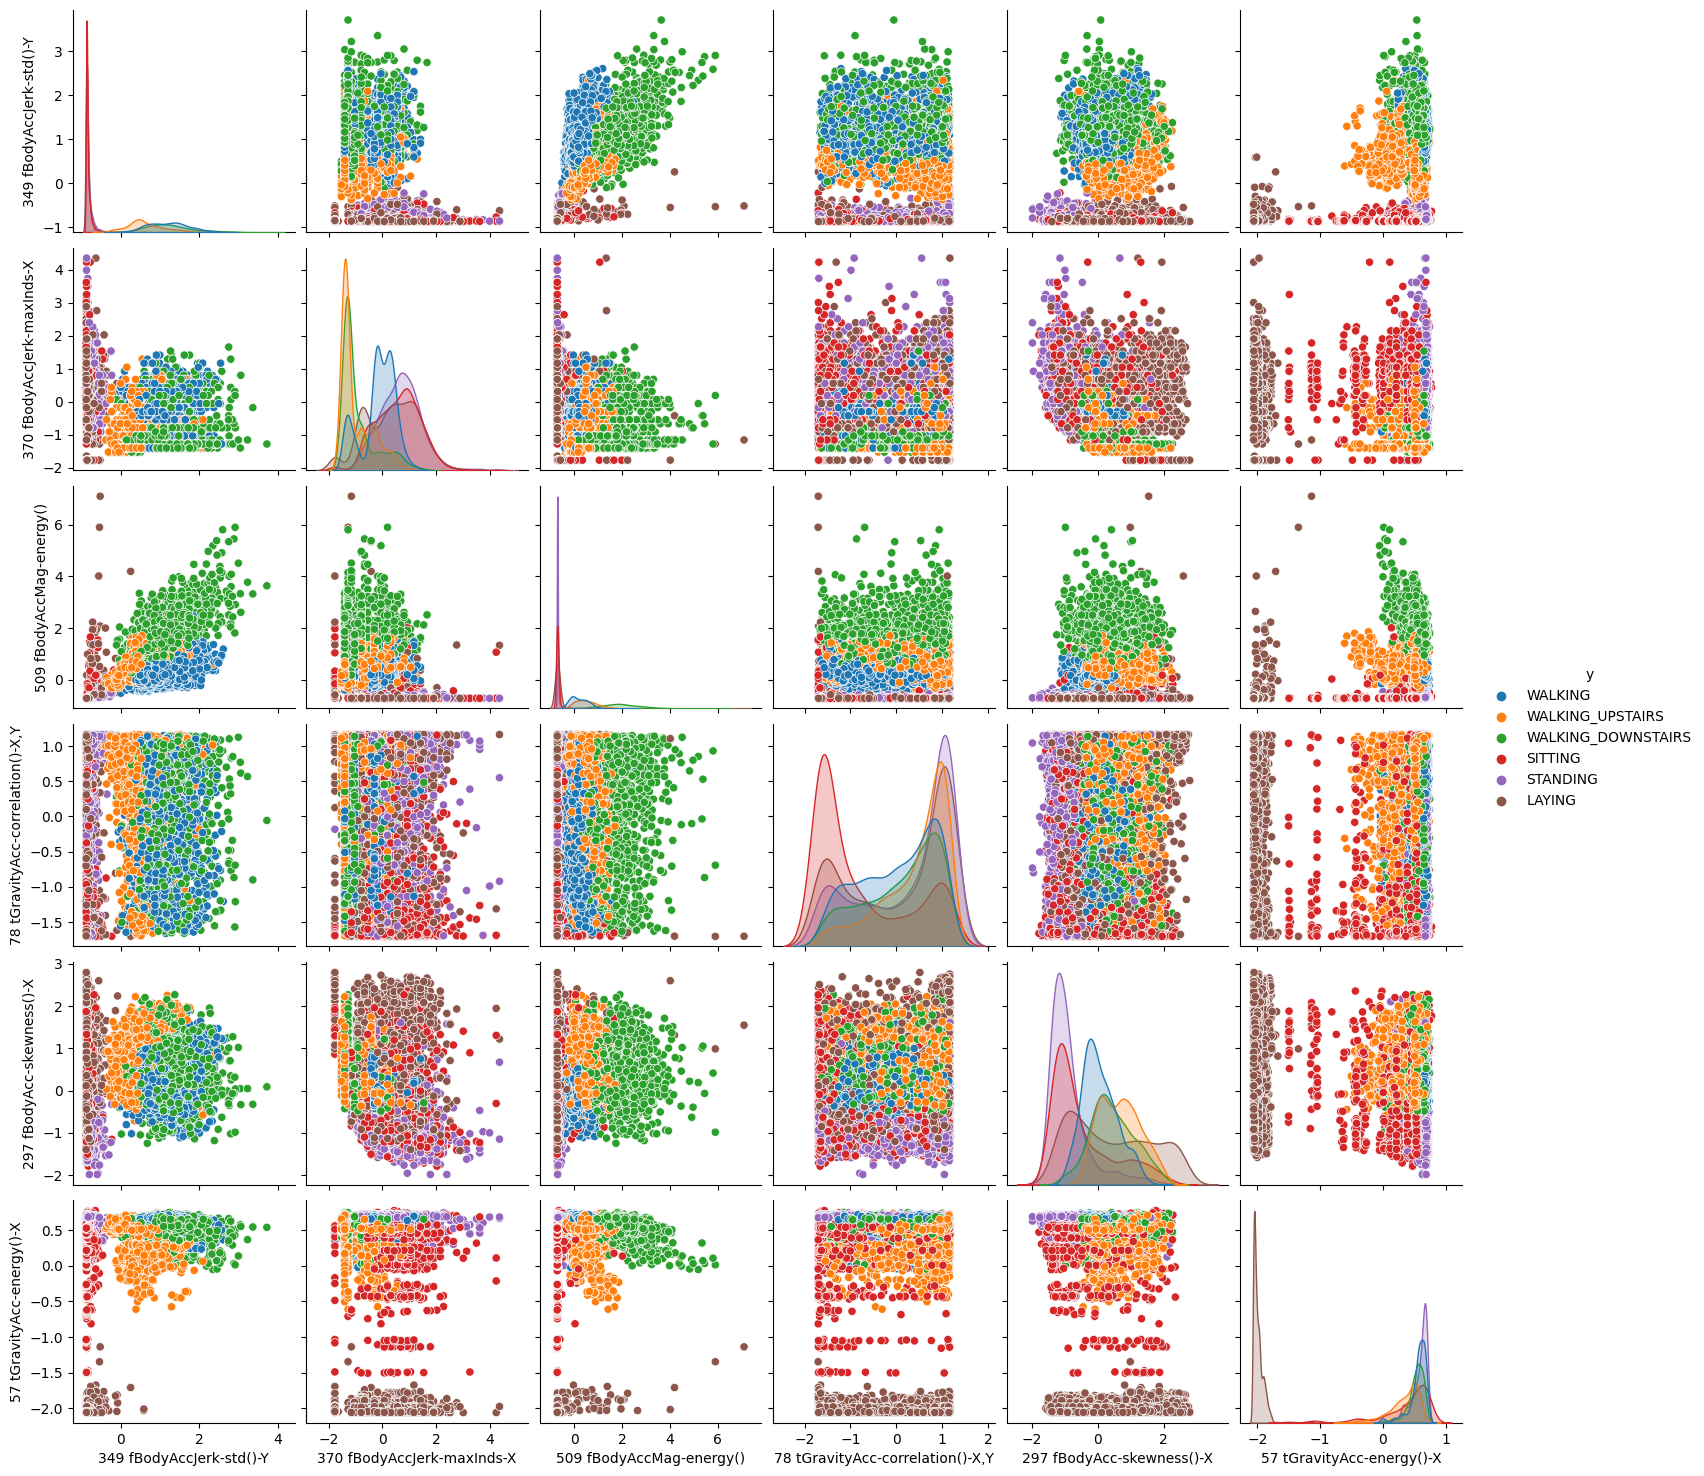

In [13]:
sns.pairplot(X_pad[colunas2], hue='y')

## Aplicando o *k-means*

Vamos rodar a análise de cluster conforme vimos na outra aula, solicitando 6 grupos, e indicando as 6 variáveis que selecionamos.

In [17]:
cluster = KMeans(n_clusters=6, n_init='auto')
cluster.fit_predict(X_pad[colunas])

array([0, 3, 3, ..., 1, 1, 5], dtype=int32)

In [18]:
cluster.labels_

array([0, 3, 3, ..., 1, 1, 5], dtype=int32)

In [19]:
X_pad['grupos'] = pd.Categorical(cluster.labels_)
colunas3 = list(colunas) + ['grupos']

## Descrevendo os grupos

Para descrever os grupos podemos utilizar todos os recursos de análise descritiva e visualização de dados que conhecemos. Vamo fazer um ```pairplot``` com opções diferentes de ```hue```, uma tabela cruzada e boxplots. Em um projeto real, tipicamente essa análise se estende tanto quanto necessário, podendo inclusive se ter um *dashboard* interativo da análise. 

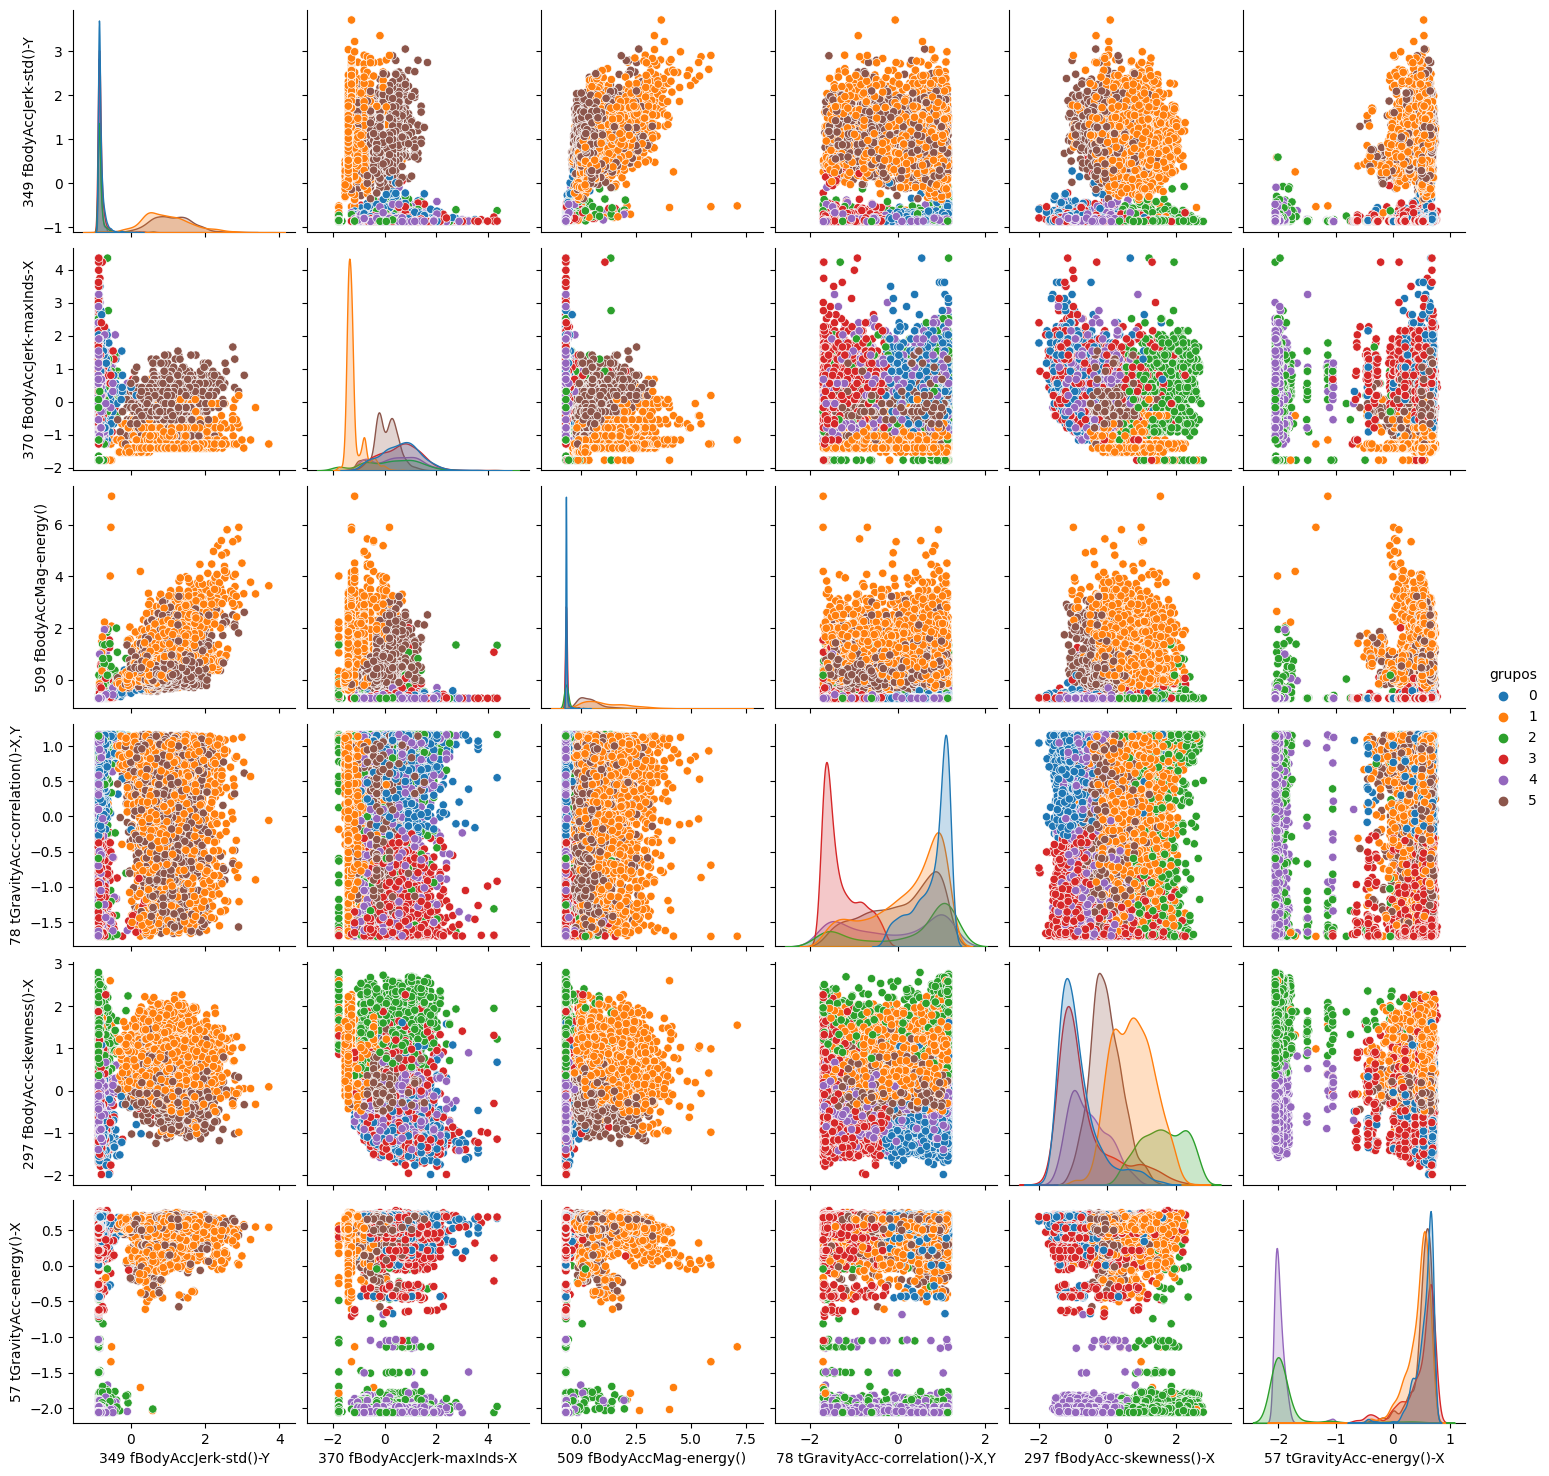

In [20]:
sns.pairplot(X_pad[colunas3], hue='grupos')

In [22]:
pd.crosstab(X_pad.y, X_pad.grupos)

grupos                0    1    2    3    4     5
y                                                
WALKING               3  179    0   13    0  1031
WALKING_UPSTAIRS      3  780    0    1    0   289
WALKING_DOWNSTAIRS    0  845    0    0    0   141
SITTING             351    8   50  856   21     0
STANDING            952    7   14  401    0     0
LAYING                0    7  627    0  773     0

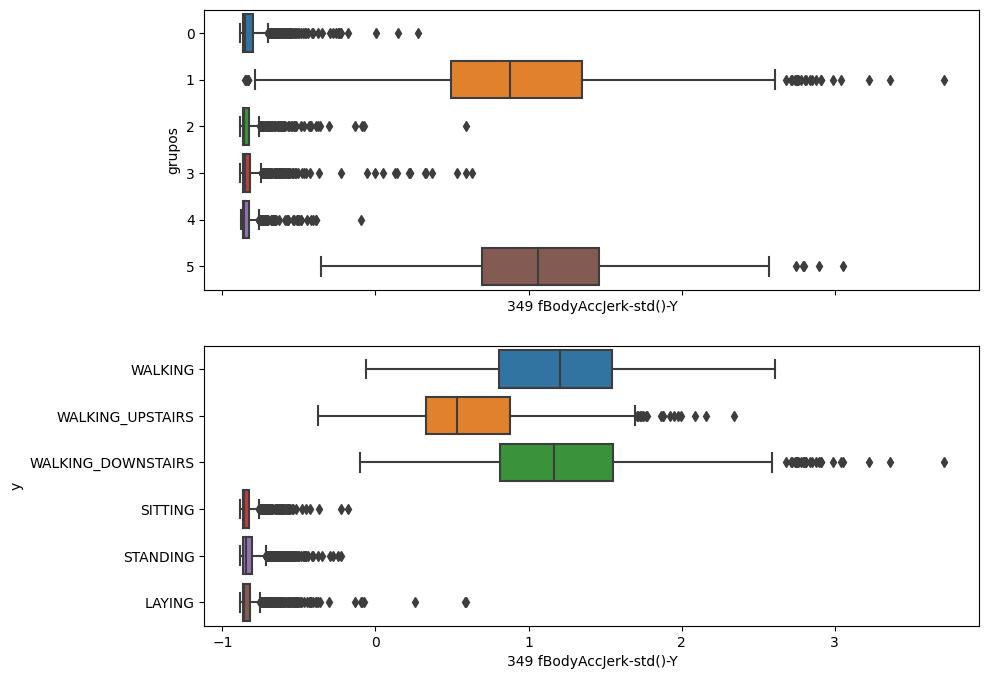

In [27]:
def dataviz_grupos(varx):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

    sns.boxplot(data=X_pad, y='grupos', x=varx, ax=ax[0])
    sns.boxplot(data=X_pad, y='y', x=varx, ax=ax[1])
    plt.show()

dataviz_grupos(colunas[0])

## Outra seleção de variáveis

O código abaixo tem outra abordagem para a seleção de variáveis: Ele faz, para cada variável, para cada grupo, um *teste-t* (teste de diferença de médias) que testa a significância da diferença da média do grupo contra as demais observações.

A ideia é selecionar variáveis que discriminem melhor cada uma das atividades, e portanto *representem* melhor a atividade.

In [28]:
from scipy.stats import ttest_ind

ttest_ind(X_pad.loc[X_pad.y.cat.codes == 0,colunas[0]], 
          X_pad.loc[X_pad.y.cat.codes != 0,colunas[0]])

Ttest_indResult(statistic=54.728079720108184, pvalue=0.0)

In [29]:
estatisticas_t = med_por_grupo.copy()
estatisticas_t.loc[:,:] = 0
estatisticas_t

1 tBodyAcc-mean()-X  2 tBodyAcc-mean()-Y  \
y                                                              
WALKING                             0.0                  0.0   
WALKING_UPSTAIRS                    0.0                  0.0   
WALKING_DOWNSTAIRS                  0.0                  0.0   
SITTING                             0.0                  0.0   
STANDING                            0.0                  0.0   
LAYING                              0.0                  0.0   

                    3 tBodyAcc-mean()-Z  4 tBodyAcc-std()-X  \
y                                                             
WALKING                             0.0                 0.0   
WALKING_UPSTAIRS                    0.0                 0.0   
WALKING_DOWNSTAIRS                  0.0                 0.0   
SITTING                             0.0                 0.0   
STANDING                            0.0                 0.0   
LAYING                              0.0                 0.0   

                    5 tBodyAcc-std()-Y  6 tBodyAcc-std()-Z  \
y                                                            
WALKING                            0.0                 0.0   
WALKING_UPSTAIRS                   0.0                 0.0   
WALKING_DOWNSTAIRS                 0.0                 0.0   
SITTING                            0.0                 0.0   
STANDING                           0.0                 0.0   
LAYING                             0.0                 0.0   

                    7 tBodyAcc-mad()-X  8 tBodyAcc-mad()-Y  \
y                                                            
WALKING                            0.0                 0.0   
WALKING_UPSTAIRS                   0.0                 0.0   
WALKING_DOWNSTAIRS                 0.0                 0.0   
SITTING                            0.0                 0.0   
STANDING                           0.0                 0.0   
LAYING                             0.0                 0.0   

                    9 tBodyAcc-mad()-Z  10 tBodyAcc-max()-X  ...  \
y                                                            ...   
WALKING                            0.0                  0.0  ...   
WALKING_UPSTAIRS                   0.0                  0.0  ...   
WALKING_DOWNSTAIRS                 0.0                  0.0  ...   
SITTING                            0.0                  0.0  ...   
STANDING                           0.0                  0.0  ...   
LAYING                             0.0                  0.0  ...   

                    552 fBodyBodyGyroJerkMag-meanFreq()  \
y                                                         
WALKING                                             0.0   
WALKING_UPSTAIRS                                    0.0   
WALKING_DOWNSTAIRS                                  0.0   
SITTING                                             0.0   
STANDING                                            0.0   
LAYING                                              0.0   

                    553 fBodyBodyGyroJerkMag-skewness()  \
y                                                         
WALKING                                             0.0   
WALKING_UPSTAIRS                                    0.0   
WALKING_DOWNSTAIRS                                  0.0   
SITTING                                             0.0   
STANDING                                            0.0   
LAYING                                              0.0   

                    554 fBodyBodyGyroJerkMag-kurtosis()  \
y                                                         
WALKING                                             0.0   
WALKING_UPSTAIRS                                    0.0   
WALKING_DOWNSTAIRS                                  0.0   
SITTING                                             0.0   
STANDING                                            0.0   
LAYING                                              0.0   

                    555 angle(tBodyAccMean,g

In [30]:
for var in [estatisticas_t.columns]:
    for grupo in X_pad.y.unique():
        estatisticas_t.loc[grupo, var] = ttest_ind(X_pad.loc[X_pad.y == grupo, var], 
                                                   X_pad.loc[X_pad.y != grupo, var])[0]
 


In [31]:
estatisticas_t

1 tBodyAcc-mean()-X  2 tBodyAcc-mean()-Y  \
y                                                              
WALKING                        0.967439            -0.067936   
WALKING_UPSTAIRS              -6.352454            -7.806395   
WALKING_DOWNSTAIRS             6.589483             1.095813   
SITTING                       -0.583854             5.381928   
STANDING                       2.812914             1.583936   
LAYING                        -3.146733            -0.664169   

                    3 tBodyAcc-mean()-Z  4 tBodyAcc-std()-X  \
y                                                             
WALKING                        0.174004           26.166673   
WALKING_UPSTAIRS              -7.084781           32.462161   
WALKING_DOWNSTAIRS             1.955108           74.054083   
SITTING                        1.784995          -36.079990   
STANDING                       1.314819          -38.077934   
LAYING                         1.452766          -35.638163   

                    5 tBodyAcc-std()-Y  6 tBodyAcc-std()-Z  \
y                                                            
WALKING                      41.620604           35.551268   
WALKING_UPSTAIRS             39.670609           44.236345   
WALKING_DOWNSTAIRS           44.669770           38.563031   
SITTING                     -36.265344          -33.920043   
STANDING                    -38.027215          -35.938748   
LAYING                      -38.876141          -36.471427   

                    7 tBodyAcc-mad()-X  8 tBodyAcc-mad()-Y  \
y                                                            
WALKING                      26.528046           41.417805   
WALKING_UPSTAIRS             31.179186           41.266271   
WALKING_DOWNSTAIRS           73.933657           42.671130   
SITTING                     -35.787226          -36.078076   
STANDING                    -37.869016          -37.971507   
LAYING                      -35.239167          -38.714397   

                    9 tBodyAcc-mad()-Z  10 tBodyAcc-max()-X  ...  \
y                                                            ...   
WALKING                      35.789081            26.816027  ...   
WALKING_UPSTAIRS             45.984088            31.764591  ...   
WALKING_DOWNSTAIRS           36.818891            74.988379  ...   
SITTING                     -33.905698           -36.014539  ...   
STANDING                    -35.956688           -37.401049  ...   
LAYING                      -36.603225           -36.833597  ...   

                    552 fBodyBodyGyroJerkMag-meanFreq()  \
y                                                         
WALKING                                       -1.203112   
WALKING_UPSTAIRS                              -4.889063   
WALKING_DOWNSTAIRS                            -3.494674   
SITTING                                        7.572307   
STANDING                                      -5.089438   
LAYING                                         6.312590   

                    553 fBodyBodyGyroJerkMag-skewness()  \
y                                                         
WALKING                                       30.946242   
WALKING_UPSTAIRS                              -6.141571   
WALKING_DOWNSTAIRS                            -1.671433   
SITTING                                       -9.759974   
STANDING                                      -5.514668   
LAYING                                        -5.831511   

                    554 fBodyBodyGyroJerkMag-kurtosis()  \
y                                                         
WALKING                                       30.364865   
WALKING_UPSTAIRS                              -6.361407   
WALKING_DOWNSTAIRS                            -4.451472   
SITTING                                       -8.057721   
STANDING                                      -4.428332   
LAYING                                        -5.458725   

                    555 angle(tBodyAccMean,g

In [32]:
colunas_tt = estatisticas_t.abs().idxmax(axis=1).values
colunas_tt

array(['355 fBodyAccJerk-max()-Y', '277 fBodyAcc-max()-Z',
       '509 fBodyAccMag-energy()', '183 tBodyGyroJerk-entropy()-X',
       '26 tBodyAcc-arCoeff()-X,1', '41 tGravityAcc-mean()-X'],
      dtype=object)

In [33]:
cluster.fit_predict(X_pad[colunas_tt])
X_pad['grupos2'] = pd.Categorical(cluster.labels_)
colunas4 = list(colunas) + ['grupos2']

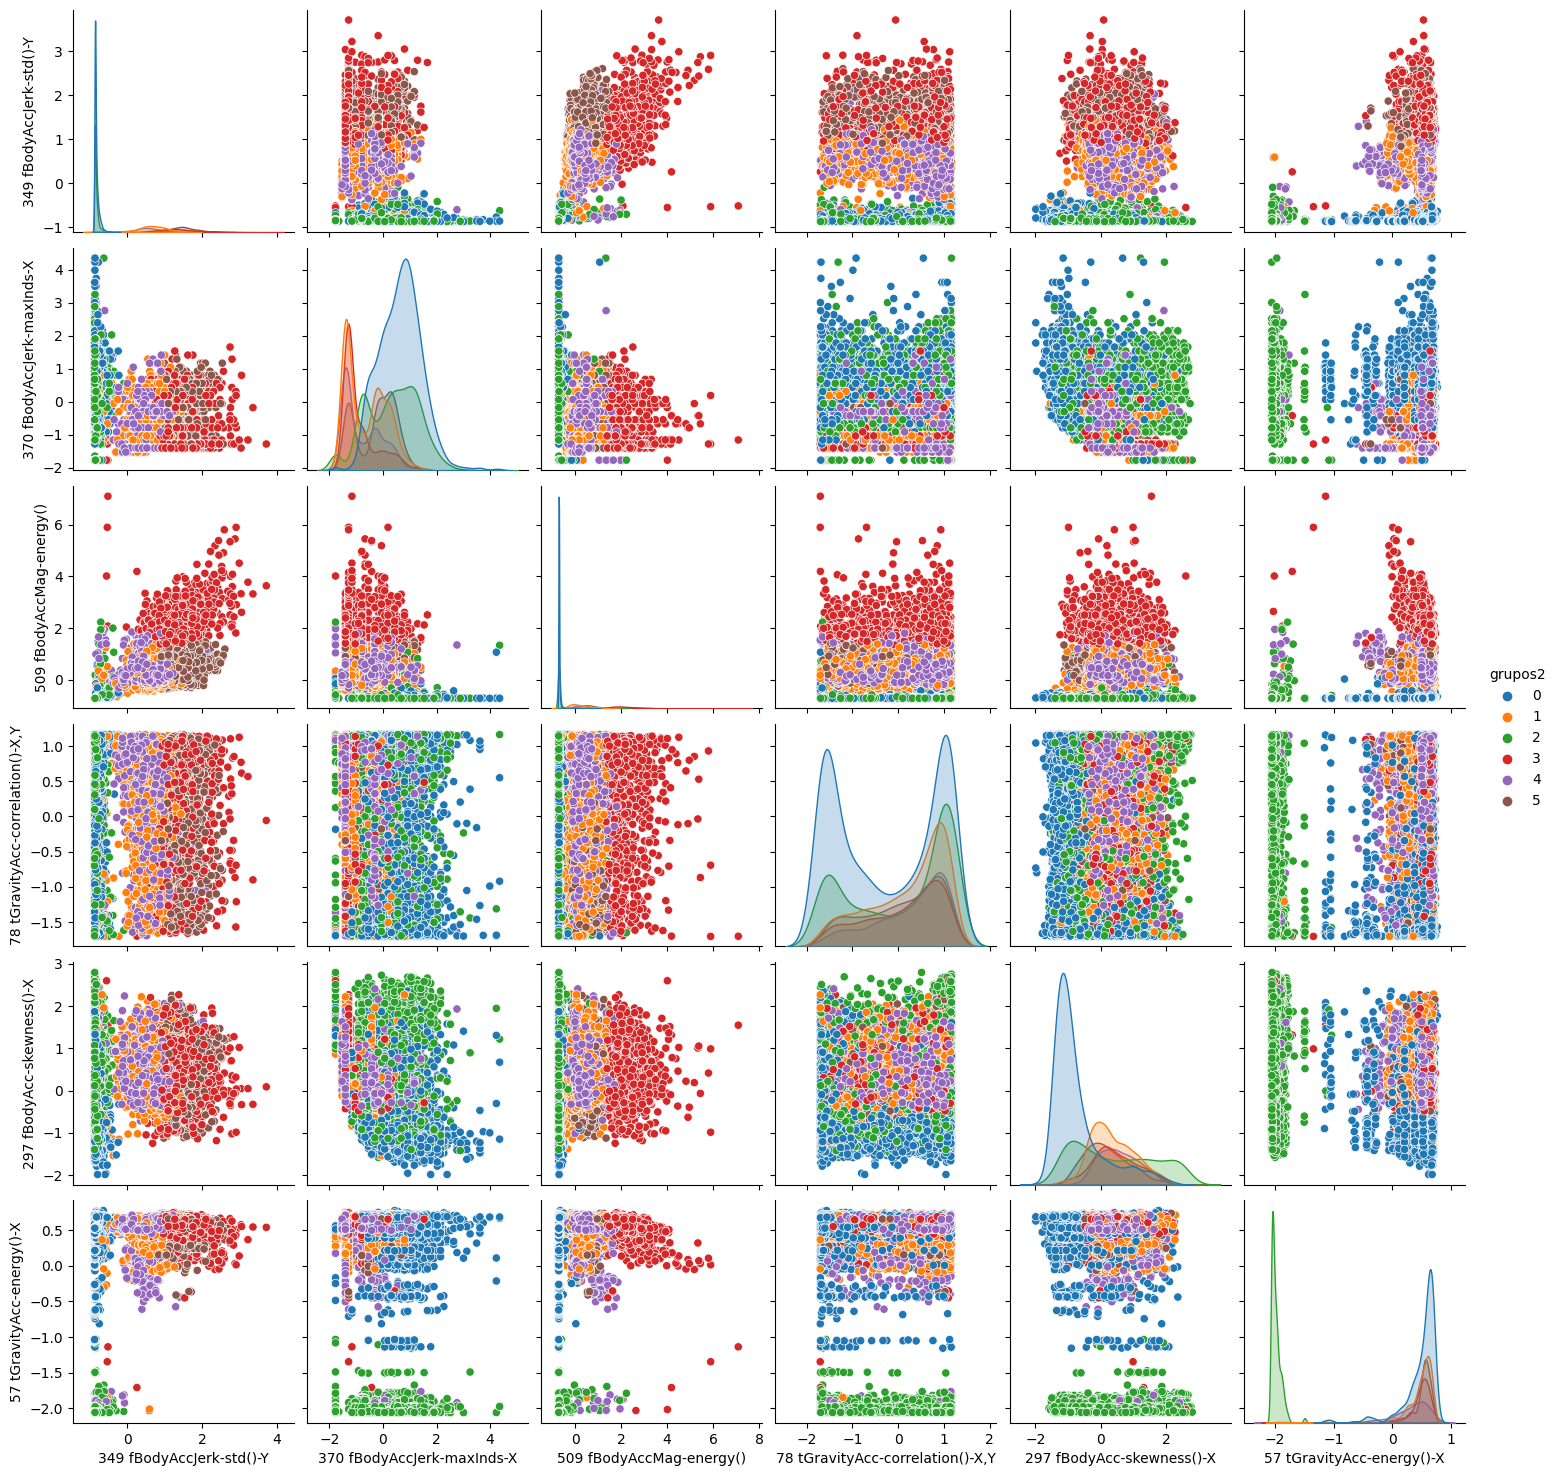

In [34]:
sns.pairplot(X_pad[colunas4], hue='grupos2')

In [36]:
pd.crosstab(X_pad.y, X_pad.grupos2)

grupos2                0    1     2    3    4    5
y                                                 
WALKING                0  461     0    5  162  598
WALKING_UPSTAIRS       0  439     0    9  476  149
WALKING_DOWNSTAIRS     0  184     0  707   26   69
SITTING             1227   28    20    1   10    0
STANDING            1338   33     0    0    3    0
LAYING                 0    2  1385    6   14    0

In [37]:
def dataviz_grupos2(varx):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

    sns.boxplot(data=X_pad, y='grupos2', x=varx, ax=ax[0])
    sns.boxplot(data=X_pad, y='y', x=varx, ax=ax[1])
    plt.show()

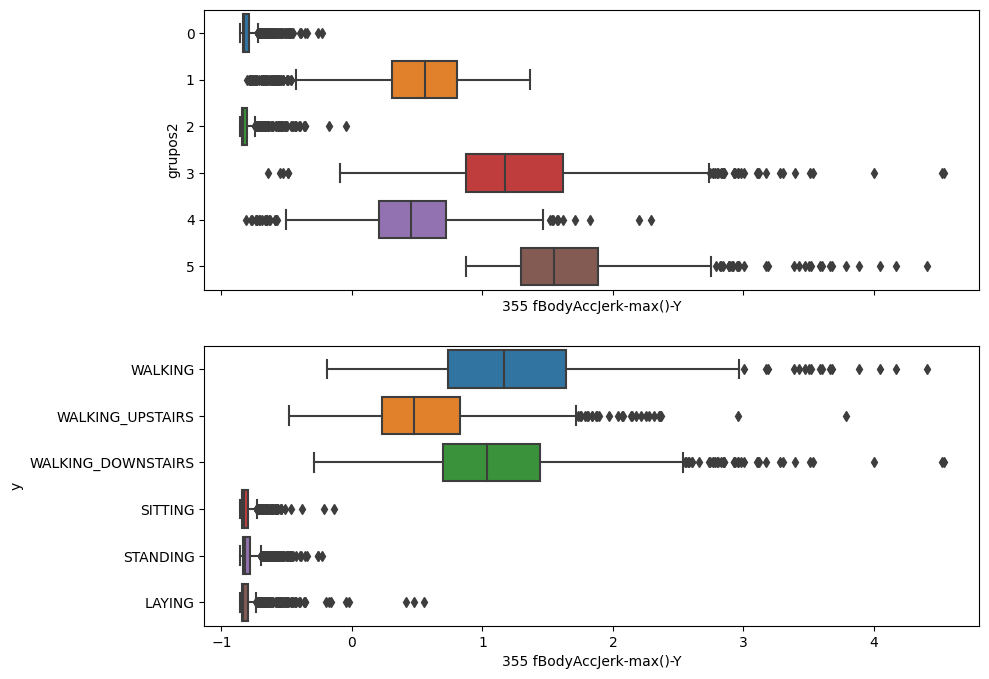

In [38]:
dataviz_grupos2(colunas_tt[0])